# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [8]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [9]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.opti(lr=lr, nesterov=True)
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 255us/step - loss: 14.4442 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 12s 243us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 12s 240us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 12s 245us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 12s 243us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 12s 237us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 24s 477us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 22s 449us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 24s 475us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 24s 487us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 24s 475us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 24s 475us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 23s 469us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 23s 462us/step - loss: 2.0861 - acc: 0.2604 - val_loss: 1.9664 - val_acc: 0.3062
Epoch 2/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.8940 - acc: 0.3333 - val_loss: 1.8592 - val_acc: 0.3412
Epoch 3/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.8225 - acc: 0.3594 - val_loss: 1.8127 - val_acc: 0.3596
Epoch 4/50
50000/50000 [==============================] - 20s 408us/step - loss: 1.7774 - acc: 0.3767 - val_loss: 1.8228 - val_acc: 0.3470
Epoch 5/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.7435 - acc: 0.3884 - val_loss: 1.7828 - val_acc: 0.3725
Epoch 6/50
50000/50000 [==============================] - 20s 399us/step - loss: 1.7169 - acc: 0.3988 - val_loss: 1.7400 - val_acc: 0.3840
Epoch 7/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.6845 - acc: 0.4103 - val_loss: 1.

50000/50000 [==============================] - 19s 373us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 18s 353us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 18s 365us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 19s 374us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 19s 378us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 18s 364us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 18s 369us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/

Epoch 21/50
50000/50000 [==============================] - 20s 404us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 20s 402us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 20s 397us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 20s 403us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 20s 403us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 20s 396us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 20s 401us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experi

50000/50000 [==============================] - 18s 357us/step - loss: 1.4822 - acc: 0.4714 - val_loss: 1.5033 - val_acc: 0.4646
Epoch 11/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.4535 - acc: 0.4798 - val_loss: 1.5059 - val_acc: 0.4581
Epoch 12/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.4266 - acc: 0.4910 - val_loss: 1.5870 - val_acc: 0.4403
Epoch 13/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.1709 - acc: 0.5800 - val_loss: 1.5228 - val_acc: 0.4843
Epoch 25/50
50000/50000 [==============================] - 18s 367us/step - loss: 0.8391 - acc: 0.6992 - val_loss: 1.8079 - val_acc: 0.4738
Epoch 48/50
50000/50000 [==============================] - 18s 370us/step - loss: 0.8221 - acc: 0.7062 - val_loss: 1.7935 - val_acc: 0.4814
Epoch 49/50
50000/50000 [==============================] - 18s 368us/step - loss: 0.8183 - acc: 0.7056 - val_loss: 1.8115 - val_acc: 0.4991
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 12s 246us/step - loss: 1.2625 - acc: 0.5609 - val_loss: 1.4003 - val_acc: 0.5029
Epoch 49/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.2595 - acc: 0.5612 - val_loss: 1.3680 - val_acc: 0.5145
Epoch 50/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.2544 - acc: 0.5633 - val_loss: 1.3811 - val_acc: 0.5133
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 14s 274us/step - loss: 0.6667 - acc: 0.7616 - val_loss: 1.7833 - val_acc: 0.5108
Epoch 49/50
50000/50000 [==============================] - 14s 276us/step - loss: 0.6579 - acc: 0.7668 - val_loss: 1.7577 - val_acc: 0.5138
Epoch 50/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.6448 - acc: 0.7703 - val_loss: 1.8055 - val_acc: 0.5126
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

50000/50000 [==============================] - 11s 212us/step - loss: 2.0393 - acc: 0.2825 - val_loss: 2.0367 - val_acc: 0.2788
Epoch 49/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.0362 - acc: 0.2835 - val_loss: 2.0336 - val_acc: 0.2794
Epoch 50/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.0330 - acc: 0.2853 - val_loss: 2.0305 - val_acc: 0.2823
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________

50000/50000 [==============================] - 13s 252us/step - loss: 0.9686 - acc: 0.6638 - val_loss: 1.5361 - val_acc: 0.4905
Epoch 49/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.9586 - acc: 0.6697 - val_loss: 1.3543 - val_acc: 0.5320
Epoch 50/50
50000/50000 [==============================] - 13s 255us/step - loss: 0.9513 - acc: 0.6708 - val_loss: 1.3619 - val_acc: 0.5317
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________

50000/50000 [==============================] - 12s 244us/step - loss: 1.6468 - acc: 0.4298 - val_loss: 1.6563 - val_acc: 0.4257
Epoch 49/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.6450 - acc: 0.4313 - val_loss: 1.6549 - val_acc: 0.4248
Epoch 50/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.6434 - acc: 0.4314 - val_loss: 1.6532 - val_acc: 0.4265
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 14s 278us/step - loss: 0.8363 - acc: 0.7132 - val_loss: 1.3631 - val_acc: 0.5453
Epoch 49/50
50000/50000 [==============================] - 14s 286us/step - loss: 0.8186 - acc: 0.7172 - val_loss: 1.4924 - val_acc: 0.5178
Epoch 50/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.8082 - acc: 0.7220 - val_loss: 1.3469 - val_acc: 0.5468
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

50000/50000 [==============================] - 11s 214us/step - loss: 2.2609 - acc: 0.1463 - val_loss: 2.2597 - val_acc: 0.1496
Epoch 49/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.2598 - acc: 0.1479 - val_loss: 2.2587 - val_acc: 0.1517
Epoch 50/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.2588 - acc: 0.1504 - val_loss: 2.2577 - val_acc: 0.1540
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________

50000/50000 [==============================] - 13s 251us/step - loss: 1.4010 - acc: 0.5131 - val_loss: 1.4641 - val_acc: 0.4849
Epoch 49/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.3958 - acc: 0.5166 - val_loss: 1.4697 - val_acc: 0.4774
Epoch 50/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.3915 - acc: 0.5161 - val_loss: 1.4548 - val_acc: 0.4838
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________

50000/50000 [==============================] - 12s 246us/step - loss: 2.0045 - acc: 0.3152 - val_loss: 2.0019 - val_acc: 0.3141
Epoch 49/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.0028 - acc: 0.3155 - val_loss: 2.0001 - val_acc: 0.3152
Epoch 50/50
50000/50000 [==============================] - 12s 242us/step - loss: 2.0010 - acc: 0.3160 - val_loss: 1.9984 - val_acc: 0.3161
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 14s 280us/step - loss: 1.3828 - acc: 0.5213 - val_loss: 1.4410 - val_acc: 0.4949
Epoch 49/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.3772 - acc: 0.5224 - val_loss: 1.4395 - val_acc: 0.4947s: 1.3778 - acc: 0
Epoch 50/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.3729 - acc: 0.5242 - val_loss: 1.4333 - val_acc: 0.4964


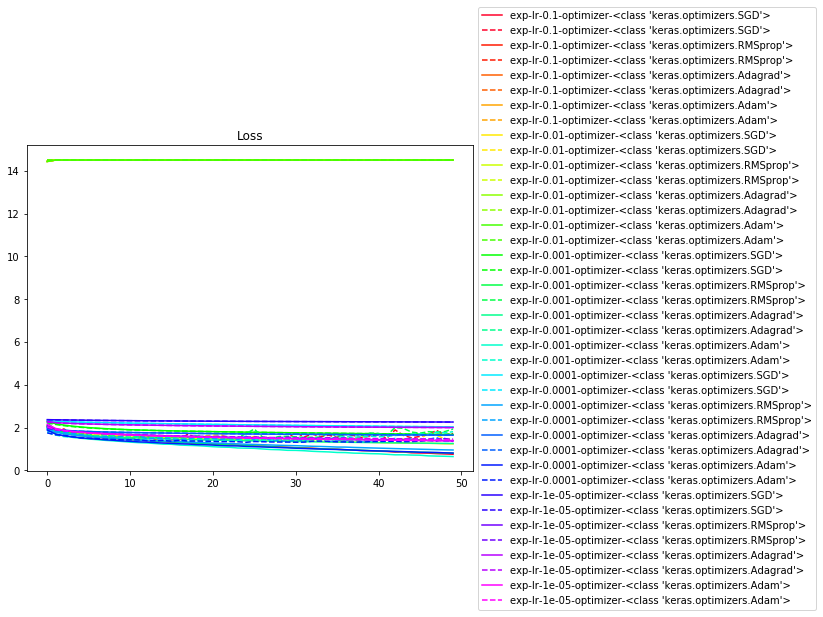

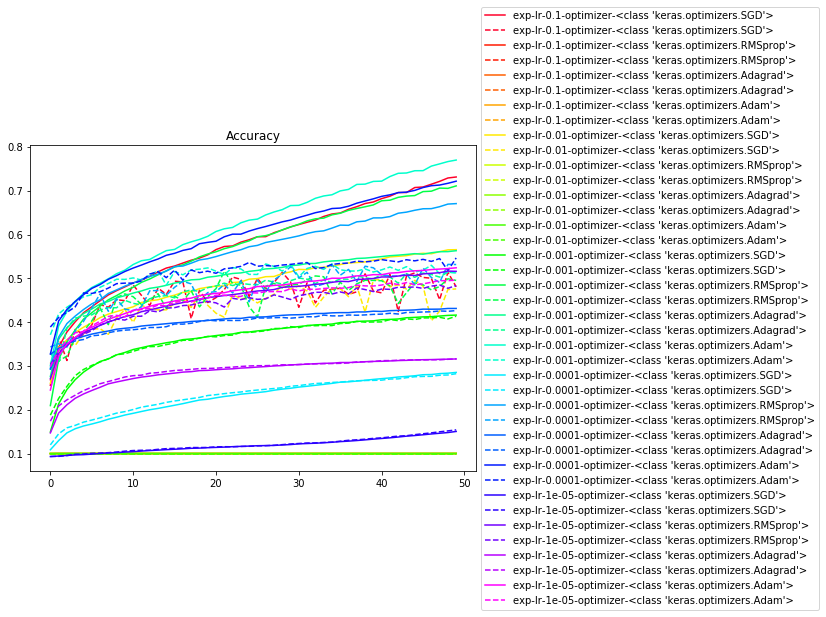

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()